# Milestone 1 - EDA and Preprocessing data 


## 1 - Extraction

In [193]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [194]:
df = pd.read_csv(r'C:\Users\VICTUS\Documents\GUC\Data eng\MileStone 1\green_tripdata_2016-11.csv')

In [195]:
df.head()

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
0,VeriFone Inc.,2016-11-01 00:25:24,2016-11-01 00:56:55,N,Nassau or Westchester,"Queens,Flushing","Unknown,Unknown",1.0,23.29,99.5,0.5,0.5,0.00,0.0,NaN,0.3,100.80,Cash,Street-hail,NaN
1,VeriFone Inc.,2016-11-01 00:03:14,2016-11-01 00:10:15,N,Standard rate,"Queens,Astoria","Queens,Sunnyside",2.0,2.13,8.5,0.5,0.5,0.00,0.0,NaN,0.3,9.80,Cash,Street-hail,NaN
2,VeriFone Inc.,2016-11-01 00:36:33,2016-11-01 00:40:05,N,Standard rate,"Queens,Astoria","Queens,Old Astoria",2.0,0.95,5.0,0.5,0.5,1.26,0.0,NaN,0.3,7.56,Credit card,Street-hail,NaN
3,VeriFone Inc.,2016-11-01 00:04:23,2016-11-01 00:14:10,N,Standard rate,"Brooklyn,Greenpoint","Manhattan,East Village",5.0,4.41,14.5,0.5,0.5,3.95,0.0,NaN,0.3,19.75,Credit card,Street-hail,NaN
4,VeriFone Inc.,2016-11-01 00:15:29,2016-11-01 00:25:04,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Manhattan,Lower East Side",1.0,2.63,10.5,0.5,0.5,2.36,0.0,NaN,0.3,14.16,Credit card,Street-hail,NaN


# 2- EDA

Exploring column names 

In [196]:
df.columns

Index(['Vendor', 'lpep pickup datetime', 'lpep dropoff datetime',
       'store and fwd flag', 'Rate type', 'PU Location', 'DO Location',
       'passenger count', 'trip distance', 'fare amount', 'extra', 'mta tax',
       'tip amount', 'tolls amount', 'ehail fee', 'improvement surcharge',
       'total amount', 'payment type', 'trip type', 'congestion surcharge'],
      dtype='object')

Data type and null observation 

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148228 entries, 0 to 1148227
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Vendor                 1148228 non-null  object 
 1   lpep pickup datetime   1148228 non-null  object 
 2   lpep dropoff datetime  1148228 non-null  object 
 3   store and fwd flag     1148228 non-null  object 
 4   Rate type              1148228 non-null  object 
 5   PU Location            1148228 non-null  object 
 6   DO Location            1148228 non-null  object 
 7   passenger count        1148041 non-null  float64
 8   trip distance          1148228 non-null  float64
 9   fare amount            1148228 non-null  float64
 10  extra                  592463 non-null   float64
 11  mta tax                1148228 non-null  float64
 12  tip amount             1148228 non-null  float64
 13  tolls amount           1148228 non-null  float64
 14  ehail fee         

Basic info about the data

In [198]:
df.describe()

,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,congestion surcharge
count,1.148041e+06,1.148228e+06,1.148228e+06,592463.000000,1.148228e+06,1.148228e+06,1.148228e+06,0.0,1.148228e+06,1.148228e+06,0.0
mean,1.359391e+00,2.664077e+00,1.183576e+01,0.661092,4.870188e-01,1.181150e+00,1.009700e-01,NaN,2.923437e-01,1.427489e+01,NaN
std,1.238274e+00,2.800892e+00,9.796097e+00,0.264770,8.524662e-02,2.372008e+00,1.112523e+00,NaN,5.082940e-02,1.122518e+01,NaN
min,1.000000e+00,0.000000e+00,-4.990000e+02,-4.500000,-5.000000e-01,-5.141000e+01,-2.304000e+01,NaN,-3.000000e-01,-4.990000e+02,NaN
25%,1.000000e+00,1.000000e+00,6.000000e+00,0.500000,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,7.800000e+00,NaN
50%,1.000000e+00,1.740000e+00,9.000000e+00,0.500000,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.100000e+01,NaN
75%,1.000000e+00,3.300000e+00,1.450000e+01,1.000000,5.000000e-01,1.960000e+00,0.000000e+00,NaN,3.000000e-01,1.680000e+01,NaN
max,3.330000e+02,2.138000e+02,6.760000e+02,4.500000,5.000000e-01,3.750000e+02,5.785500e+02,NaN,3.000000e-01,6.768000e+02,NaN


In [199]:
df.describe(include=['object'])

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,payment type,trip type
count,1148228,1148228,1148228,1148228,1148228,1148228,1148228,1103836,1148228
unique,2,883591,882699,2,7,237,258,5,3
top,VeriFone Inc.,2016-11-25 12:22:31,2016-11-06 00:00:00,N,Standard rate,"Manhattan,East Harlem North","Manhattan,East Harlem North",Cash,Street-hail
freq,909611,10,91,1144553,1120049,66490,37779,554613,1124593


In [200]:
df.shape

(1148228, 20)

In [201]:
taxi_df = df.copy()

# Questions Asked for better understanding.

- Is there any patterns in the "Trip distance" based on the day or time of day? Are taxi trips longer during specific days or hours?

- Are there specific geographic areas or "PU Locations" where taxi drivers tend to accumulate more "Tip amount"? Is there a correlation between location and tipping behavior?

- Is there a difference in "Trip type" (street-hail vs. dispatch) for trips with various "Trip distances"? Are longer trips more likely to be dispatched?

- Are there any geographic patterns regarding the tolls amount?, is there specefic DO locations that have high tolls amount?

- Are there specific days or hours where trips are more common or where higher fares are typically charged?

## Investigation 

 **Q1**. Is there any patterns in the "Trip distance" and "Total amount" based on the day or time of day? Are taxi trips longer or more expensive during specific days or hours?

Changing the pickup datetime and dropoff datetime from string to date time format 

In [202]:
taxi_df['lpep pickup datetime'] = pd.to_datetime(taxi_df['lpep pickup datetime'])
taxi_df['lpep dropoff datetime'] = pd.to_datetime(taxi_df['lpep dropoff datetime'])

In [203]:
days_distance = taxi_df[['lpep pickup datetime', 'trip distance']]

In [204]:
days_distance['days'] = days_distance['lpep pickup datetime'].dt.day
days_distance['hours'] = days_distance['lpep pickup datetime'].dt.hour

In [205]:
days_distance.head()

,lpep pickup datetime,trip distance,days,hours
0,2016-11-01 00:25:24,23.29,1,0
1,2016-11-01 00:03:14,2.13,1,0
2,2016-11-01 00:36:33,0.95,1,0
3,2016-11-01 00:04:23,4.41,1,0
4,2016-11-01 00:15:29,2.63,1,0


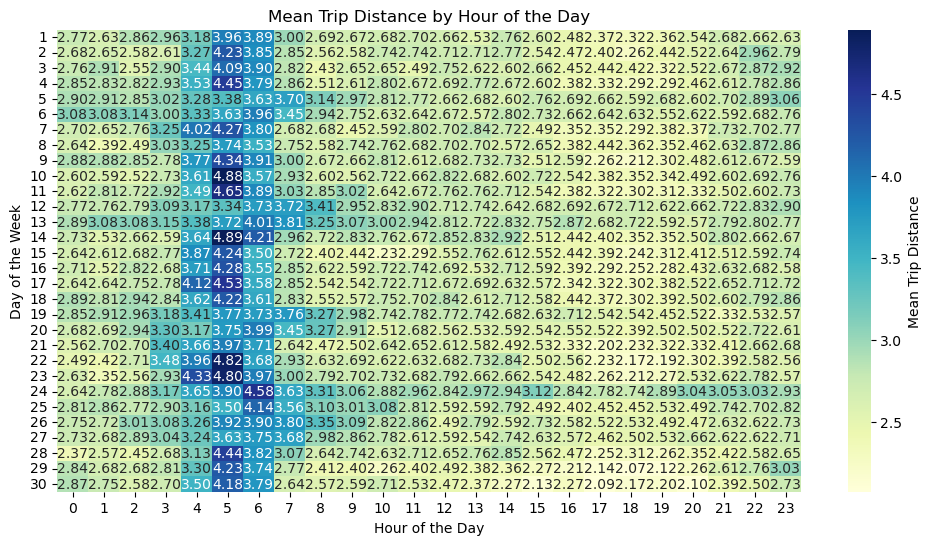

In [206]:
hourly_means = days_distance.groupby(['days', 'hours'])['trip distance'].mean()

# Assuming you have imported the necessary libraries and data

# Pivot the data to create a table with hours on the x-axis and days on the y-axis
hourly_pivot = days_distance.pivot_table(values='trip distance', index='days', columns='hours', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_pivot, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Mean Trip Distance'})
plt.title("Mean Trip Distance by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()


## Observation

- we can find that the trip distance is high at 5 Am which indicates that some people may live far from there work so they walk up early and go early 

**Q2** - Are there specific geographic areas or "PU Locations" where taxi drivers tend to accumulate more "Tip amount"? Is there a correlation between location and tipping behavior?

In [207]:
taxi_df['PU Location'].unique()

array(['Queens,Flushing', 'Queens,Astoria', 'Brooklyn,Greenpoint',
       'Brooklyn,Williamsburg (South Side)',
       'Brooklyn,Williamsburg (North Side)', 'Brooklyn,East Williamsburg',
       'Brooklyn,Downtown Brooklyn/MetroTech', 'Queens,Elmhurst',
       'Manhattan,East Harlem North', 'Manhattan,Hamilton Heights',
       'Queens,Sunnyside', 'Brooklyn,Park Slope', 'Brooklyn,Boerum Hill',
       'Brooklyn,DUMBO/Vinegar Hill', 'Manhattan,East Harlem South',
       'Brooklyn,Crown Heights North', 'Queens,Elmhurst/Maspeth',
       'Brooklyn,Cobble Hill', 'Manhattan,Central Harlem',
       'Queens,Kew Gardens', 'Brooklyn,Fort Greene',
       'Manhattan,Morningside Heights', 'Manhattan,Inwood',
       'Manhattan,Washington Heights South',
       'Manhattan,Central Harlem North', 'Brooklyn,Brooklyn Heights',
       'Queens,Long Island City/Hunters Point', 'Queens,Corona',
       'Brooklyn,Crown Heights South',
       'Manhattan,Washington Heights North', 'Queens,North Corona',
       'Que

In [208]:
ress = taxi_df.groupby('PU Location')['tip amount'].mean()

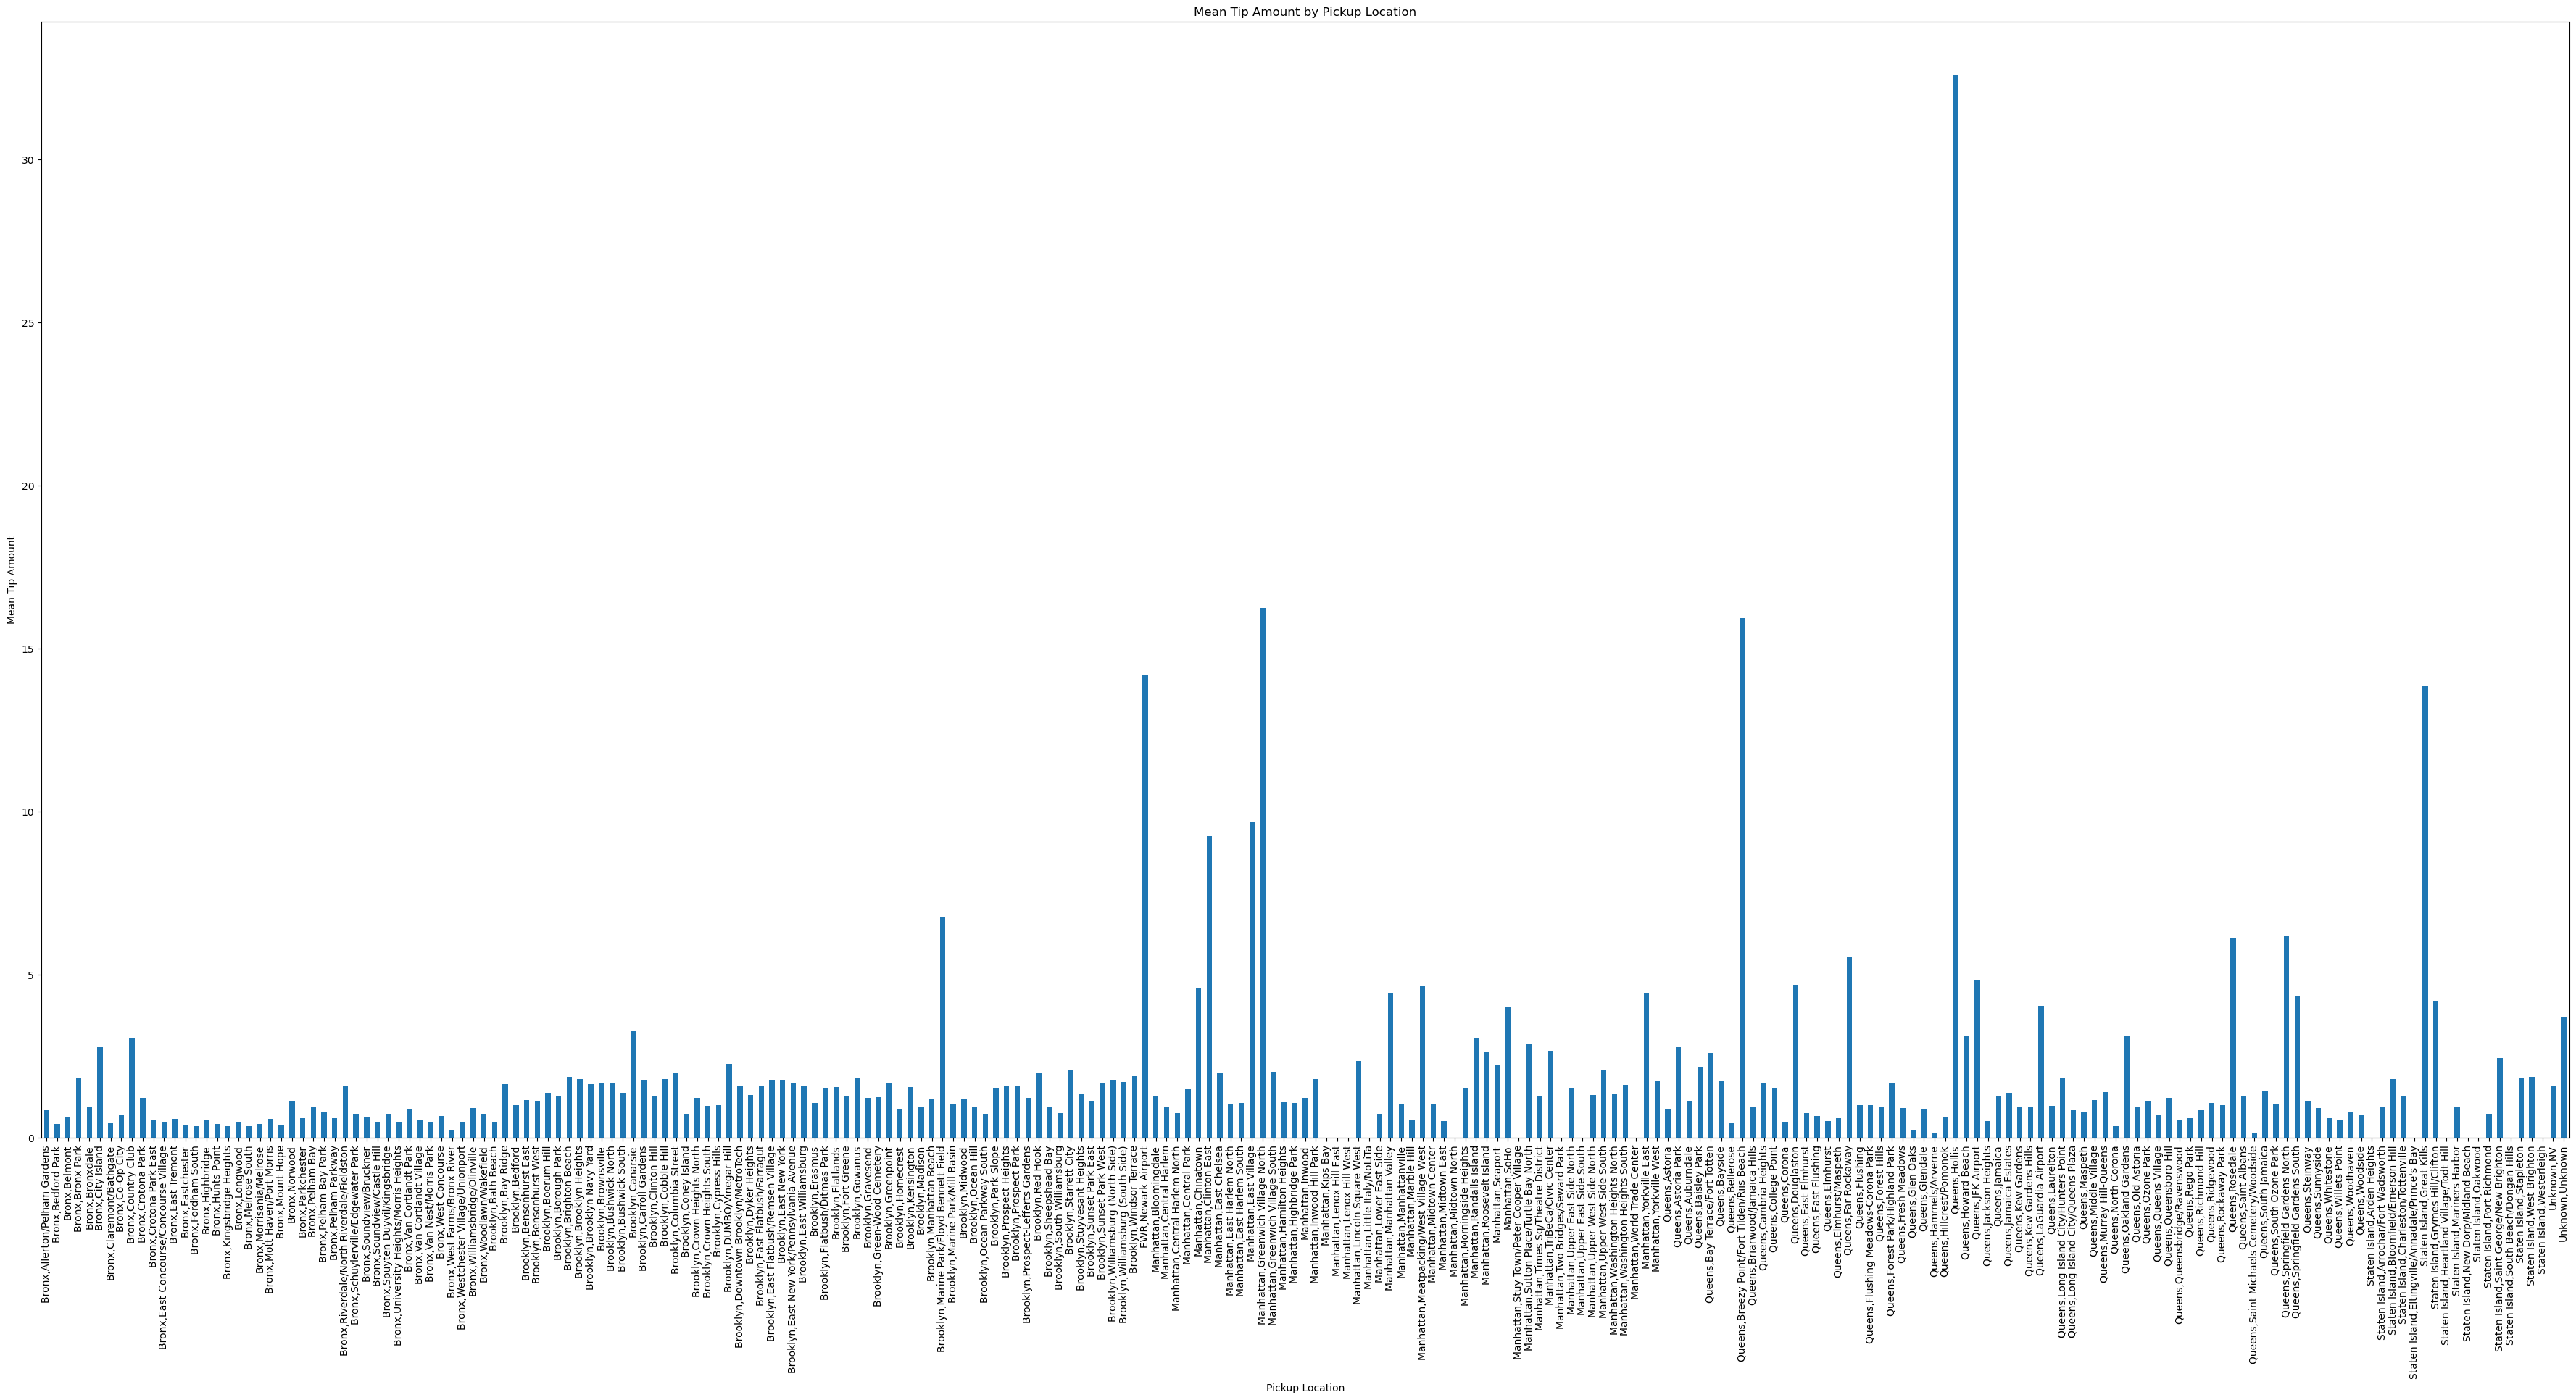

In [209]:
plt.figure(figsize=(45, 20))  # Set the size of the plot
ress.plot(kind='bar')
plt.title("Mean Tip Amount by Pickup Location")
plt.xlabel("Pickup Location")
plt.ylabel("Mean Tip Amount")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

Taking only the top 20 locations that have the highest tip amount for better visualizations 

In [210]:
first_ress = ress.sort_values(ascending=False)[0:20]

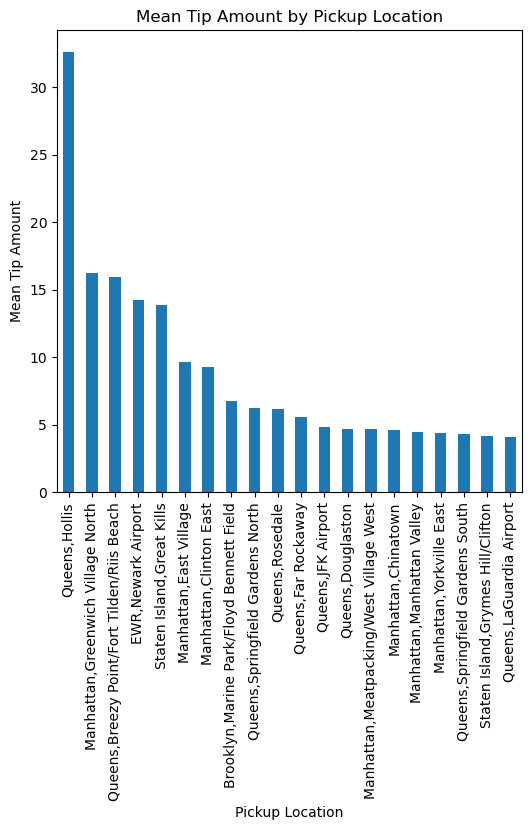

In [211]:
plt.figure(figsize=(6, 6))  # Set the size of the plot
first_ress.plot(kind='bar')
plt.title("Mean Tip Amount by Pickup Location")
plt.xlabel("Pickup Location")
plt.ylabel("Mean Tip Amount")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

## Observation 
It is clear that Queens,Hollis has the highest tip amount 



**Q3.** Is there a difference in "Trip type" (street-hail vs. dispatch) for trips with various "Trip distances"? Are longer trips more likely to be dispatched?

In [212]:
taxi_df["trip type"].unique()

array(['Street-hail', 'Dispatch', 'Unknown'], dtype=object)

In [213]:
anss = taxi_df[["trip type", "trip distance"]]
anss.groupby("trip type").sum()

,trip distance
trip type,
Dispatch,72196.86
Street-hail,2986770.97
Unknown,0.00


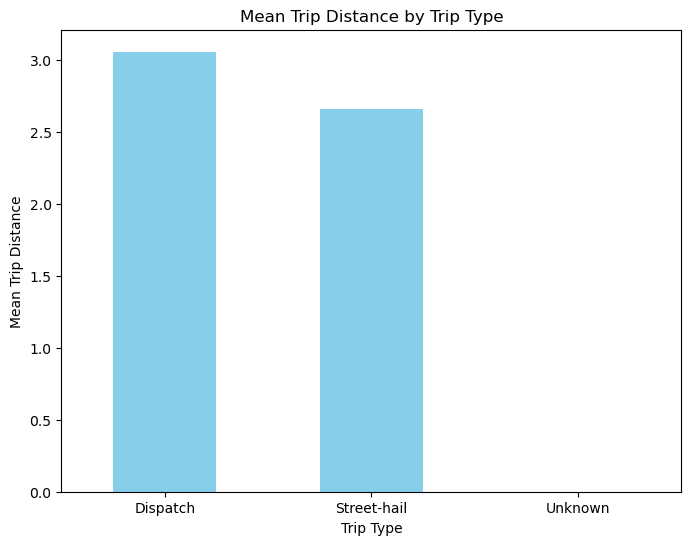

In [214]:
# Group the data by "trip type" and calculate the mean
mean_values = anss.groupby("trip type")["trip distance"].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
mean_values.plot(kind='bar', color='skyblue')
plt.title("Mean Trip Distance by Trip Type")
plt.xlabel("Trip Type")
plt.ylabel("Mean Trip Distance")
plt.xticks(rotation=0)  # Rotate x-axis labels, if needed
plt.show()

## Observation 
it is clear in the graph that trips with large distance is most likely to be dispached

**Q4.** Are there any geographic patterns regarding the tolls amount?, is there specefic DO locations that have high tolls amount?

In [215]:
taxi_df.columns 

Index(['Vendor', 'lpep pickup datetime', 'lpep dropoff datetime',
       'store and fwd flag', 'Rate type', 'PU Location', 'DO Location',
       'passenger count', 'trip distance', 'fare amount', 'extra', 'mta tax',
       'tip amount', 'tolls amount', 'ehail fee', 'improvement surcharge',
       'total amount', 'payment type', 'trip type', 'congestion surcharge'],
      dtype='object')

In [216]:
taxi_df.groupby('DO Location')['tolls amount'].mean().sort_values(ascending=False)[0:15]

DO Location
Staten Island,Oakwood                        11.080000
EWR,Newark Airport                           11.017859
Staten Island,South Beach/Dongan Hills        9.970909
Staten Island,New Dorp/Midland Beach          9.848889
Staten Island,Arden Heights                   9.569091
Staten Island,Stapleton                       8.602892
Staten Island,Great Kills                     8.310000
Staten Island,Westerleigh                     6.818462
Staten Island,Arrochar/Fort Wadsworth         6.204800
Staten Island,Grymes Hill/Clifton             5.671905
Staten Island,Port Richmond                   5.540000
Staten Island,Heartland Village/Todt Hill     4.986000
Manhattan,Randalls Island                     4.479703
Staten Island,West Brighton                   4.432000
Staten Island,Bloomfield/Emerson Hill         3.450133
Name: tolls amount, dtype: float64

In [217]:
taxi_df.groupby('PU Location')['tolls amount'].mean().sort_values(ascending=False)[0:15]

PU Location
Staten Island,Great Kills                 11.080000
Staten Island,Grymes Hill/Clifton          5.915000
Manhattan,Kips Bay                         5.540000
Manhattan,Greenwich Village North          5.540000
Staten Island,Arrochar/Fort Wadsworth      5.214118
Staten Island,Stapleton                    3.693333
Staten Island,South Beach/Dongan Hills     3.693333
Manhattan,Randalls Island                  3.220824
Manhattan,Manhattan Valley                 2.770000
Manhattan,Yorkville East                   1.662000
Manhattan,Seaport                          1.385000
Queens,Astoria Park                        1.038750
Staten Island,Port Richmond                0.923333
EWR,Newark Airport                         0.700000
Queens,Cambria Heights                     0.692500
Name: tolls amount, dtype: float64

In [218]:
! pip install geopy


Defaulting to user installation because normal site-packages is not writeable


In [219]:
import folium
from geopy.geocoders import Nominatim
import pandas as pd

# Create a geocoder object
geolocator = Nominatim(user_agent="my_geocoder")

# Assuming you have your taxi_df DataFrame
top_tolls = taxi_df.groupby('DO Location')['tolls amount'].mean().sort_values(ascending=False)[0:15]

# Create a new DataFrame with the 'DO Location' and the mean tolls amount
top_tolls_df = pd.DataFrame({'DO Location': top_tolls.index, 'Mean Tolls Amount': top_tolls.values})

# Create a map centered around New York City or a specific location
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Add markers for the top locations with the highest tolls
for index, row in top_tolls_df.iterrows():
    location_name = row['DO Location']
    mean_tolls = row['Mean Tolls Amount']
    
    # Use Geopy to obtain the coordinates
    location = geolocator.geocode(location_name)
    
    if location:
        # Get the latitude and longitude
        lat, lon = location.latitude, location.longitude
        
        # Add a marker to the map
        folium.Marker(location=[lat, lon], popup=f'Mean Tolls Amount: ${mean_tolls:.2f}').add_to(m)

# Save the map to an HTML file or display it
m.save('top_tolls_map.html')


In [220]:
from IPython.display import IFrame

# Provide the file path of the saved HTML map
map_path = 'top_tolls_map.html'

# Define the width and height for displaying the map (in pixels)
map_width = 800
map_height = 600

# Create an IFrame to embed the map
IFrame(map_path, width=map_width, height=map_height)

Here in the graph we could see Do locations with high tolls amount

**Q.5.** - Are there specific days or hours where trips are more common or where higher fares are typically charged?

In [221]:
days_distance['fare amount'] = taxi_df['fare amount']

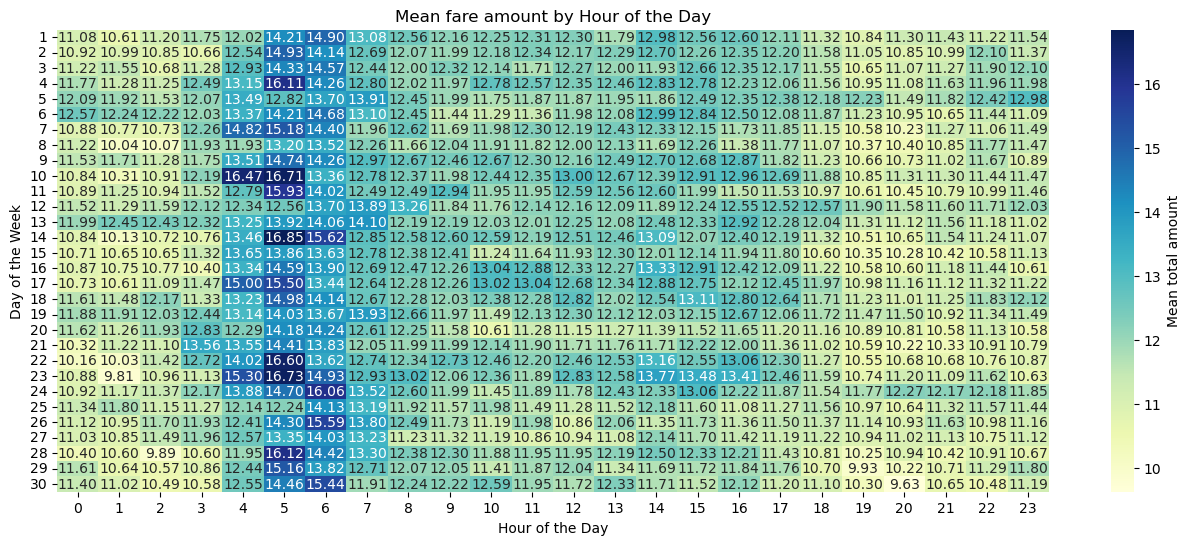

In [222]:
# Pivot the data to create a table with hours on the x-axis and days on the y-axis
hourly_pivot = days_distance.pivot_table(values='fare amount', index='days', columns='hours', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(hourly_pivot, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Mean total amount'})
plt.title("Mean fare amount by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

At 5 Am is the highest fare

# 3 - Cleaning Data

### Tidying up column names

In [223]:
taxi_df.columns = taxi_df.columns.str.replace(' ', '_').str.lower()

In [224]:
taxi_df.head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,VeriFone Inc.,2016-11-01 00:25:24,2016-11-01 00:56:55,N,Nassau or Westchester,"Queens,Flushing","Unknown,Unknown",1.0,23.29,99.5,0.5,0.5,0.00,0.0,NaN,0.3,100.80,Cash,Street-hail,NaN
1,VeriFone Inc.,2016-11-01 00:03:14,2016-11-01 00:10:15,N,Standard rate,"Queens,Astoria","Queens,Sunnyside",2.0,2.13,8.5,0.5,0.5,0.00,0.0,NaN,0.3,9.80,Cash,Street-hail,NaN
2,VeriFone Inc.,2016-11-01 00:36:33,2016-11-01 00:40:05,N,Standard rate,"Queens,Astoria","Queens,Old Astoria",2.0,0.95,5.0,0.5,0.5,1.26,0.0,NaN,0.3,7.56,Credit card,Street-hail,NaN
3,VeriFone Inc.,2016-11-01 00:04:23,2016-11-01 00:14:10,N,Standard rate,"Brooklyn,Greenpoint","Manhattan,East Village",5.0,4.41,14.5,0.5,0.5,3.95,0.0,NaN,0.3,19.75,Credit card,Street-hail,NaN
4,VeriFone Inc.,2016-11-01 00:15:29,2016-11-01 00:25:04,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Manhattan,Lower East Side",1.0,2.63,10.5,0.5,0.5,2.36,0.0,NaN,0.3,14.16,Credit card,Street-hail,NaN


## Observe inconsistent data

In [225]:
duplicates = taxi_df.duplicated()

In [226]:
duplicate_rows = taxi_df[duplicates]
duplicate_rows.head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1148219,"Creative Mobile Technologies, LLC",2016-11-15 22:46:31,2016-11-15 22:53:01,N,Standard rate,"Brooklyn,Bushwick South","Brooklyn,Bushwick South",1.0,1.10,6.5,0.5,0.5,1.55,0.0,NaN,0.3,9.35,Credit card,Street-hail,NaN
1148220,VeriFone Inc.,2016-11-18 20:29:43,2016-11-18 20:41:15,N,Standard rate,"Manhattan,Washington Heights South","Manhattan,Manhattan Valley",1.0,2.90,11.5,0.5,0.5,1.50,0.0,NaN,0.3,14.30,Credit card,Street-hail,NaN
1148221,VeriFone Inc.,2016-11-03 18:42:20,2016-11-03 19:03:11,N,Standard rate,"Manhattan,Morningside Heights","Bronx,Melrose South",1.0,3.87,16.0,1.0,0.5,0.00,0.0,NaN,0.3,17.80,Cash,Street-hail,NaN
1148222,VeriFone Inc.,2016-11-16 17:39:36,2016-11-16 18:01:59,N,Standard rate,"Queens,Jamaica","Queens,Auburndale",3.0,4.40,18.5,1.0,0.5,4.06,0.0,NaN,0.3,24.36,Credit card,Street-hail,NaN
1148223,"Creative Mobile Technologies, LLC",2016-11-28 12:16:36,2016-11-28 12:27:43,N,Standard rate,"Brooklyn,Brooklyn Heights","Brooklyn,Gowanus",1.0,1.50,9.0,NaN,0.5,1.95,0.0,NaN,0.3,11.75,Credit card,Street-hail,NaN


In [227]:
num_duplicates = duplicates.sum()
num_duplicates

8

dropping the duplicates from the dataframe

In [228]:
taxi_df = taxi_df.drop_duplicates()

In [229]:
taxi_df.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,congestion_surcharge
count,1.148033e+06,1.148220e+06,1.148220e+06,592457.000000,1.148220e+06,1.148220e+06,1.148220e+06,0.0,1.148220e+06,1.148220e+06,0.0
mean,1.359392e+00,2.664081e+00,1.183577e+01,0.661092,4.870187e-01,1.181149e+00,1.009707e-01,NaN,2.923436e-01,1.427490e+01,NaN
std,1.238277e+00,2.800899e+00,9.796122e+00,0.264771,8.524691e-02,2.372014e+00,1.112527e+00,NaN,5.082958e-02,1.122521e+01,NaN
min,1.000000e+00,0.000000e+00,-4.990000e+02,-4.500000,-5.000000e-01,-5.141000e+01,-2.304000e+01,NaN,-3.000000e-01,-4.990000e+02,NaN
25%,1.000000e+00,1.000000e+00,6.000000e+00,0.500000,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,7.800000e+00,NaN
50%,1.000000e+00,1.740000e+00,9.000000e+00,0.500000,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.100000e+01,NaN
75%,1.000000e+00,3.300000e+00,1.450000e+01,1.000000,5.000000e-01,1.960000e+00,0.000000e+00,NaN,3.000000e-01,1.680000e+01,NaN
max,3.330000e+02,2.138000e+02,6.760000e+02,4.500000,5.000000e-01,3.750000e+02,5.785500e+02,NaN,3.000000e-01,6.768000e+02,NaN


dealing with the negative values in the money columns

In [230]:
taxi_copy = taxi_df.copy()

In [231]:
num = taxi_copy.select_dtypes(include=['int', 'float'])

What we have here is that the we have chosen a negative values that are in the data then convert it into positive, if we found 
data that is duplicated so we know here that the duplicated trip is a **refund**

In [232]:
for col in num:
    taxi_copy[col] = taxi_copy[col].abs()

In [233]:
duplicates = taxi_copy.duplicated()

# Use boolean indexing to get the indices of duplicated rows
duplicated_indices = taxi_copy.index[duplicates]

In [234]:
taxi_df = taxi_df.drop(duplicated_indices)

In [235]:
neg_df = taxi_df[taxi_df['fare_amount'] < 0]
ind = neg_df[( ((neg_df['payment_type'] == "Cash") | (neg_df['payment_type'] == "Credit Card") ) & (neg_df['trip_distance'] == 0))].index

Regarding the negative values of the fare amount which is dependent on the distance and time, It was found that some data where negative however the trip distance where = 0 and the paymenttype was cash which does not make any sence.

values that are negative but the payment method where cash or credit might be entered wrongly so we replaced the negative with positive values which make more sense.

So at the end we will drop the rows with negative values that are cash and have zero trip_distance because they are incorrect and they are with a small percentage.

In [236]:
taxi_df = taxi_df.drop(ind)

Here we have the case that the trip is done and it was cash paid however it is negative so it is corrected by taking the absolute value of the data while we have taken into consideration that we removed the duplicated rows so now this will be a normal trip 

In [237]:
idx2 = neg_df[( ((neg_df['payment_type'] == "Cash") | (neg_df['payment_type'] == "Credit Card") ) & (neg_df['trip_distance'] != 0))].index

In [238]:
df_temp2 = taxi_df.copy()

In [239]:
numeric = df_temp2.select_dtypes(include=['int', 'float'])

In [240]:
for column in numeric:
    for index in idx2:
        if index in df_temp2.index:  # Check if the index exists in the DataFrame
            df_temp2.at[index, column] = abs(df_temp2.at[index, column])

Applying to the original dataframe again 

In [241]:
taxi_df = df_temp2

Lets move to the case of No charge and dispute

In [242]:
negative_dis = taxi_df[(taxi_df['fare_amount'] < 0)]
negative_dis['payment_type'].value_counts()

No charge      1584
Dispute         727
Credit card       1
Name: payment_type, dtype: int64

In [243]:
No_charge_cond_index = taxi_df[((taxi_df['payment_type'] == 'No charge') & (taxi_df['trip_distance'] == 0) & (taxi_df['fare_amount'] < 0)) ].index

In [244]:
trial = taxi_df.copy()

The trip has distance = 0 and no charge which make sense that we replace the negative of the fare amount by zero in order to support the No charge column idea

In [245]:
columns_to_zero = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']

for col in columns_to_zero:
    for i in No_charge_cond_index:
        trial.loc[i,col] = 0

In [246]:
trial[((taxi_df['fare_amount'] < 0) & (trial['payment_type'] == 'No charge')) & (trial['trip_distance'] == 0)].head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
18,VeriFone Inc.,2016-11-01 00:07:47,2016-11-01 00:07:54,N,Negotiated fare,"Queens,Astoria","Queens,Astoria",3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,No charge,Dispatch,NaN
4549,VeriFone Inc.,2016-11-01 06:57:22,2016-11-01 06:57:29,N,JFK,"Manhattan,East Harlem North","Manhattan,East Harlem North",1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,No charge,Street-hail,NaN
5158,VeriFone Inc.,2016-11-01 07:42:54,2016-11-01 07:43:48,N,Negotiated fare,"Queens,Douglaston","Queens,Douglaston",1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,No charge,Dispatch,NaN
11904,VeriFone Inc.,2016-11-01 11:55:11,2016-11-01 11:55:21,N,Standard rate,"Manhattan,Washington Heights South","Manhattan,Washington Heights South",1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,No charge,Street-hail,NaN
13455,VeriFone Inc.,2016-11-01 12:27:14,2016-11-01 12:27:38,N,Standard rate,"Manhattan,Central Harlem North","Manhattan,Central Harlem North",1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,No charge,Street-hail,NaN


Applying to the original dataframe

In [247]:
taxi_df = trial

Dealing with dispute 

In [248]:
dispute_ind = taxi_df[((taxi_df['fare_amount'] < 0) & (taxi_df['payment_type'] == 'Dispute') & (taxi_df['trip_distance'] == 0 ))].index

In [249]:
taxi_df = taxi_df.drop(dispute_ind)

In [250]:
taxi_df['trip_duration'] = taxi_df['lpep_dropoff_datetime'] - taxi_df['lpep_pickup_datetime']

In [251]:
taxi_df['trip_duration_hours'] = taxi_df['trip_duration'].dt.total_seconds() / 3600  # Duration in hours

In [252]:
taxi_df[taxi_df['trip_duration_hours'] > 20].head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,trip_duration_hours
230,VeriFone Inc.,2016-11-01 00:03:27,2016-11-02 00:00:00,N,Standard rate,"Queens,Flushing","Queens,Bayside",1.0,5.86,17.5,0.5,0.5,3.76,0.0,NaN,0.3,22.56,Credit card,Street-hail,NaN,0 days 23:56:33,23.942500
323,VeriFone Inc.,2016-11-01 00:20:45,2016-11-02 00:11:06,N,Standard rate,"Queens,Astoria","Queens,Woodside",1.0,2.04,8.5,0.5,0.5,0.00,0.0,NaN,0.3,9.80,Cash,Street-hail,NaN,0 days 23:50:21,23.839167
491,VeriFone Inc.,2016-11-01 00:50:04,2016-11-01 20:54:41,N,Standard rate,"Manhattan,Central Harlem North","Manhattan,Washington Heights South",1.0,1.32,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,Cash,Street-hail,NaN,0 days 20:04:37,20.076944
574,VeriFone Inc.,2016-11-01 00:24:20,2016-11-01 23:38:28,N,Standard rate,"Manhattan,Morningside Heights","Manhattan,East Harlem North",1.0,2.38,10.0,0.5,0.5,0.00,0.0,NaN,0.3,11.30,Credit card,Street-hail,NaN,0 days 23:14:08,23.235556
687,VeriFone Inc.,2016-11-01 00:16:31,2016-11-02 00:15:29,N,Standard rate,"Brooklyn,East Williamsburg","Brooklyn,Bushwick South",1.0,2.33,10.0,0.5,0.5,0.00,0.0,NaN,0.3,11.30,Cash,Street-hail,NaN,0 days 23:58:58,23.982778


These data is incorrect because as we could see in the trip duration we will find that there are trips that have durations greater than 20 hours and also to make sure that they are incorrect we will se the trip distance and compare 

In [253]:
taxi_df[((taxi_df['trip_duration_hours'] > 20 ) & (taxi_df['trip_distance'] > 30) )]

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,trip_duration_hours
397890,VeriFone Inc.,2016-11-11 12:09:49,2016-11-12 11:27:34,N,Standard rate,"Brooklyn,Crown Heights North","Queens,JFK Airport",1.0,32.67,90.5,NaN,0.5,0.0,0.0,NaN,0.3,91.3,Cash,Street-hail,NaN,0 days 23:17:45,23.295833


We could find here that the trip distance is 32.67 and it took 23.295833 hours which does not make any sense. I do not know how to handle it therefor I leave it as it is but I know that it is incorrect or I will investage it in the outliers part 

Checking of the sum of the amounts is equal to the total amount.

In [254]:
copy = taxi_df.copy()

In [255]:
columns_to_sum = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']
copy['total_payment'] = copy[columns_to_sum].sum(axis=1) # Sum all except total
pd.set_option('display.max_columns', None)


In [256]:
diff = copy['total_payment'] - copy['total_amount']
con_diff = diff > 0

If the summation is greater then we can fix the total amount by equating to the total amount

In [257]:
copy.loc[con_diff, 'total_amount'] = copy.loc[con_diff,'total_payment']

Removing it after checking and successful replacing to avoid confusion 

In [258]:
taxi_df = copy.drop('total_payment', axis=1)

# Missing Data

In [259]:
#checking nulls
taxi_df.isnull().sum()

vendor                         0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
rate_type                      0
pu_location                    0
do_location                    0
passenger_count              187
trip_distance                  0
fare_amount                    0
extra                     555448
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                1148014
improvement_surcharge          0
total_amount                   0
payment_type               44392
trip_type                      0
congestion_surcharge     1148014
trip_duration                  0
trip_duration_hours            0
dtype: int64

All the values of ehail_fee and congestion_surcharge is null so it will not be useful in our analysis so we drop it

In [260]:
taxi_df = taxi_df.drop(['ehail_fee', 'congestion_surcharge' ], axis=1)

In [261]:
passenger_count_nan = taxi_df.loc[taxi_df[taxi_df['passenger_count'].isnull()].index]

**Passenger count nulls** 

In [262]:
passenger_count_nan['trip_type'].value_counts()

Dispatch       171
Street-hail      9
Unknown          7
Name: trip_type, dtype: int64

In [263]:
passenger_count_nan['rate_type'].value_counts()

Negotiated fare    180
Unknown              7
Name: rate_type, dtype: int64

In [264]:
passenger_count_nan['store_and_fwd_flag'].value_counts()

N    181
Y      6
Name: store_and_fwd_flag, dtype: int64

**Passenger count is:** Missing at random (MAR): because the missing variables are more likely to be having trips that are there is no exact reasoning but there is a pattern:
- Dispached 
- Negotiated fare
- store_and_fwd_flag : N

**Handeling passenger count** 

In [265]:
taxi_df['passenger_count'].value_counts()

1.0      969898
2.0       88889
5.0       40083
3.0       22585
6.0       18545
4.0        7746
7.0          37
8.0          32
9.0           7
333.0         5
Name: passenger_count, dtype: int64

Since data is skewed so we cannot replace with the median because it is not uniform 

In [266]:
taxi_df['passenger_count'].fillna(taxi_df['passenger_count'].median(), inplace=True)

In [267]:
taxi_df['passenger_count'].isnull().sum()

0

**Extra Nulls**

In [268]:
extra_nan = taxi_df.loc[taxi_df[taxi_df['extra'].isnull()].index]

In [269]:
extra_nan

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration,trip_duration_hours
19,VeriFone Inc.,2016-11-01 00:07:47,2016-11-01 00:07:54,N,Negotiated fare,"Queens,Astoria","Queens,Astoria",3.0,0.00,35.0,NaN,0.0,0.0,0.0,0.0,35.0,Cash,Dispatch,0 days 00:00:07,0.001944
96,VeriFone Inc.,2016-11-01 00:00:56,2016-11-01 00:10:44,N,Negotiated fare,"Queens,Sunnyside","Queens,Elmhurst",3.0,2.38,15.0,NaN,0.0,0.0,0.0,0.0,15.0,Cash,Dispatch,0 days 00:09:48,0.163333
150,VeriFone Inc.,2016-11-01 00:37:31,2016-11-01 00:37:38,N,Negotiated fare,"Manhattan,Central Harlem North","Manhattan,Central Harlem North",1.0,0.00,20.0,NaN,0.0,0.0,0.0,0.0,20.0,Cash,Dispatch,0 days 00:00:07,0.001944
174,"Creative Mobile Technologies, LLC",2016-11-01 00:35:06,2016-11-01 00:52:36,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Bushwick South",1.0,3.00,13.5,NaN,0.5,2.0,0.0,0.3,16.3,Credit card,Street-hail,0 days 00:17:30,0.291667
206,"Creative Mobile Technologies, LLC",2016-11-01 00:09:08,2016-11-01 00:17:36,N,Negotiated fare,"Manhattan,Central Harlem","Manhattan,Hamilton Heights",1.0,1.70,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Cash,Dispatch,0 days 00:08:28,0.141111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148102,VeriFone Inc.,2016-11-30 23:29:21,2016-11-30 23:32:29,N,Negotiated fare,"Bronx,Mount Hope","Bronx,West Concourse",6.0,0.72,12.0,NaN,0.0,0.0,0.0,0.0,12.0,Credit card,Dispatch,0 days 00:03:08,0.052222
1148157,VeriFone Inc.,2016-11-30 23:27:01,2016-11-30 23:27:20,N,Negotiated fare,"Unknown,Unknown","Unknown,Unknown",1.0,0.00,140.0,NaN,0.0,0.0,0.0,0.0,140.0,Credit card,Dispatch,0 days 00:00:19,0.005278
1148159,VeriFone Inc.,2016-11-30 23:36:59,2016-11-30 23:49:22,N,Negotiated fare,"Bronx,University Heights/Morris Heights","Bronx,Woodlawn/Wakefield",1.0,7.35,15.0,NaN,0.0,0.0,0.0,0.0,15.0,Cash,Dispatch,0 days 00:12:23,0.206389
1148160,VeriFone Inc.,2016-11-30 23:20:23,2016-11-30 23:22:19,N,Negotiated fare,"Bronx,Van Nest/Morris Park","Bronx,Van Nest/Morris Park",1.0,0.15,10.0,NaN,0.0,0.0,0.0,0.0,10.0,Cash,Dispatch,0 days 00:01:56,0.032222


In [270]:
extra_nan['store_and_fwd_flag'].value_counts()

N    553555
Y      1893
Name: store_and_fwd_flag, dtype: int64

In [271]:
extra_nan['pu_location'].value_counts()

Manhattan,East Harlem North        39668
Manhattan,Central Harlem           34867
Manhattan,East Harlem South        33880
Manhattan,Morningside Heights      25891
Queens,Astoria                     24070
                                   ...  
Manhattan,Upper West Side South        1
Staten Island,Oakwood                  1
Manhattan,Chinatown                    1
Manhattan,Lower East Side              1
Manhattan,Kips Bay                     1
Name: pu_location, Length: 219, dtype: int64

No relation therefor **Extra** Missing completely at random MCAR

Observing rush hours and taking the highest repeated 4 hours that is equal to one and half 

In [272]:
extra_one = taxi_df[taxi_df['extra'] == 1.0]
extra_one['lpep_pickup_datetime'].dt.hour.value_counts()

18    50668
19    47301
17    47102
16    39558
20     1669
15     1515
21      252
22      195
23      172
0       157
14      147
12      127
13      119
11      116
9       116
8       115
1       114
10      100
7        77
2        66
5        58
3        49
6        46
4        39
Name: lpep_pickup_datetime, dtype: int64

In [273]:
extra_half = taxi_df[taxi_df['extra'] == 0.5]
extra_half['lpep_pickup_datetime'].dt.hour.value_counts()

20    65798
21    63439
22    58540
23    53545
0     45183
1     37131
2     25554
3     20021
4     16224
5     10142
19     2910
6       407
18      315
17      228
8       222
7       216
9       187
16      148
15      140
11      127
14      123
10      120
13      101
12       92
Name: lpep_pickup_datetime, dtype: int64

In [274]:
rush_hours_one = extra_one['lpep_pickup_datetime'].dt.hour.value_counts()[0:4]
rush_hours_half = extra_half['lpep_pickup_datetime'].dt.hour.value_counts()[0:4]

In [275]:
print(rush_hours_half.index)
print(rush_hours_one)

Int64Index([20, 21, 22, 23], dtype='int64')
18    50668
19    47301
17    47102
16    39558
Name: lpep_pickup_datetime, dtype: int64


In [276]:
pu_hours = taxi_df['lpep_pickup_datetime'].dt.hour

In [277]:
condition_half = ((taxi_df['extra'].isnull()) & ((pu_hours == 16) | (pu_hours == 17) | (pu_hours == 18) | (pu_hours == 19)))

# Use .loc to assign the value to the 'extra' column for rows that meet the condition
taxi_df.loc[condition_half, 'extra'] = 0.5

In [278]:
condition_one = ((taxi_df['extra'].isnull()) & ((pu_hours == 20) | (pu_hours == 21) | (pu_hours == 22) | (pu_hours == 23)))

taxi_df.loc[condition_half, 'extra'] = 1

In [279]:
condition_else = (taxi_df['extra'].isnull())
                  
taxi_df.loc[condition_else, 'extra'] = taxi_df.loc[condition_else, 'total_amount'] - taxi_df.loc[condition_else, 'improvement_surcharge'] - taxi_df.loc[condition_else, 'tolls_amount'] - taxi_df.loc[condition_else, 'tip_amount']


in this case we have the extra is either 0.5 or 1 so we have get the highest value counts of hour that have the extra = 0 and 1 so that if we see the same hours (rush hours) we replace it with 0 or 1 other with we get the remaining amount from subtracting the total amount from all amounts except the extra

In [280]:
taxi_df['extra'].isnull().sum()

0

**payment_type handeling missing data**

In [281]:
payment_type_nan = taxi_df.loc[taxi_df[taxi_df['payment_type'].isnull()].index]

In [282]:
payment_type_nan

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration,trip_duration_hours
14,"Creative Mobile Technologies, LLC",2016-11-01 00:10:41,2016-11-01 00:49:34,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Manhattan,Hamilton Heights",2.0,12.8,39.5,0.5,0.5,5.00,0.0,0.3,45.80,NaN,Street-hail,0 days 00:38:53,0.648056
60,"Creative Mobile Technologies, LLC",2016-11-01 00:05:46,2016-11-01 00:14:49,N,Standard rate,"Manhattan,Central Harlem North","Manhattan,Manhattanville",1.0,1.5,8.0,0.5,0.5,1.85,0.0,0.3,11.15,NaN,Street-hail,0 days 00:09:03,0.150833
85,"Creative Mobile Technologies, LLC",2016-11-01 00:13:39,2016-11-01 00:20:10,N,Standard rate,"Queens,Steinway","Queens,Steinway",1.0,1.8,8.0,0.5,0.5,0.00,0.0,0.3,9.30,NaN,Street-hail,0 days 00:06:31,0.108611
193,"Creative Mobile Technologies, LLC",2016-11-01 00:32:50,2016-11-01 00:39:14,N,Standard rate,"Manhattan,Morningside Heights","Manhattan,East Harlem North",1.0,1.5,7.0,0.5,0.5,0.00,0.0,0.3,8.30,NaN,Street-hail,0 days 00:06:24,0.106667
208,"Creative Mobile Technologies, LLC",2016-11-01 00:06:00,2016-11-01 00:10:10,N,Standard rate,"Manhattan,East Harlem North","Manhattan,East Harlem North",1.0,0.6,5.0,0.5,0.5,0.00,0.0,0.3,6.30,NaN,Street-hail,0 days 00:04:10,0.069444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148078,"Creative Mobile Technologies, LLC",2016-11-30 23:32:54,2016-11-30 23:37:28,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Greenpoint",1.0,1.2,5.5,0.5,0.5,1.35,0.0,0.3,8.15,NaN,Street-hail,0 days 00:04:34,0.076111
1148079,"Creative Mobile Technologies, LLC",2016-11-30 23:45:52,2016-11-30 23:57:54,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Fort Greene",1.0,3.1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,NaN,Street-hail,0 days 00:12:02,0.200556
1148095,"Creative Mobile Technologies, LLC",2016-11-30 23:37:58,2016-11-30 23:48:19,N,Standard rate,"Queens,Elmhurst","Queens,North Corona",2.0,2.3,10.0,0.5,0.5,0.00,0.0,0.3,11.30,NaN,Street-hail,0 days 00:10:21,0.172500
1148175,"Creative Mobile Technologies, LLC",2016-11-30 23:41:04,2016-11-30 23:51:26,N,Standard rate,"Queens,Forest Hills","Queens,Hillcrest/Pomonok",1.0,2.5,10.5,0.5,0.5,0.00,0.0,0.3,11.80,NaN,Street-hail,0 days 00:10:22,0.172778


In [283]:
payment_type_nan['vendor'].value_counts()

Creative Mobile Technologies, LLC    44392
Name: vendor, dtype: int64

**payment type** is not missing at random (NMAR) as it has the same behavior at which all the missing data belongs to the same vendor 100%

In [284]:
taxi_df['payment_type'].fillna(value=taxi_df['payment_type'].mode()[0], inplace=True)

In [285]:
taxi_df['payment_type'].isnull().sum()

0

In [286]:
taxi_df.isnull().sum()

vendor                   0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
rate_type                0
pu_location              0
do_location              0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
trip_duration            0
trip_duration_hours      0
dtype: int64

# Outliers 

In [287]:
taxi_df.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_duration_hours
count,1.148014e+06,1.148014e+06,1.148014e+06,1.148014e+06,1.148014e+06,1.148014e+06,1.148014e+06,1.148014e+06,1.148014e+06,1148014,1.148014e+06
mean,1.359330e+00,2.664550e+00,1.184910e+01,5.526193e+00,4.872694e-01,1.181387e+00,1.010120e-01,2.925004e-01,1.428927e+01,0 days 00:20:15.043356614,3.375120e-01
std,1.238225e+00,2.800930e+00,9.701360e+00,9.222087e+00,8.354224e-02,2.372116e+00,1.112411e+00,4.974244e-02,1.113843e+01,0 days 01:39:55.943072281,1.665540e+00
min,1.000000e+00,0.000000e+00,-2.000000e+02,-2.000000e+02,-5.000000e-01,-5.141000e+01,0.000000e+00,-3.000000e-01,-2.000000e+02,-3 days +00:22:50,-7.161944e+01
25%,1.000000e+00,1.000000e+00,6.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,7.800000e+00,0 days 00:05:53,9.805556e-02
50%,1.000000e+00,1.740000e+00,9.000000e+00,1.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.100000e+01,0 days 00:09:53,1.647222e-01
75%,1.000000e+00,3.300000e+00,1.450000e+01,8.000000e+00,5.000000e-01,1.960000e+00,0.000000e+00,3.000000e-01,1.680000e+01,0 days 00:16:29,2.747222e-01
max,3.330000e+02,2.138000e+02,6.760000e+02,6.765000e+02,5.000000e-01,3.750000e+02,5.785500e+02,3.000000e-01,6.768000e+02,0 days 23:59:57,2.399917e+01


In [288]:
taxi_df.skew(axis=0, skipna=True)

passenger_count           85.529302
trip_distance              3.975584
fare_amount                6.349974
extra                      6.515747
mta_tax                   -6.995063
tip_amount                25.130987
tolls_amount             202.335307
improvement_surcharge     -7.080636
total_amount               5.767217
trip_duration_hours       13.277193
dtype: float64

In [289]:
def get_cutoff(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)
    cut_off = IQR * 2.5 
    lower = Q1 - cut_off
    upper =  Q3 + cut_off
    return lower,upper


In [290]:
def floor_and_cap(column):
    floor=column.quantile(0.1)
    cap=column.quantile(0.9)
    return floor,cap

Starting with **passenger count**

In [291]:
taxi_df.passenger_count.value_counts()

1.0      970085
2.0       88889
5.0       40083
3.0       22585
6.0       18545
4.0        7746
7.0          37
8.0          32
9.0           7
333.0         5
Name: passenger_count, dtype: int64

Since the green taxi can only fit up to 6 people because it is a normal car this info was known by a research of mine 

Therefor we will drop passenger counts that are greater than 6

In [292]:
taxi_df = taxi_df.drop(taxi_df[taxi_df['passenger_count'] > 6].index)

In [293]:
taxi_df.passenger_count.skew()

3.2432569576817425

**Trip_distance**

In [294]:
lower, upper=get_cutoff(taxi_df.trip_distance)
df1 = taxi_df[taxi_df.trip_distance < lower]
df2 = taxi_df[taxi_df.trip_distance > upper]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

2.3
Total number of outliers are 39810


In [295]:
floor, cap=floor_and_cap(taxi_df.trip_distance)

for i in df1.index:
    taxi_df.at[i, 'trip_distance'] = floor

for i in df2.index:
    taxi_df.at[i, 'trip_distance'] = cap

In [296]:
taxi_df.trip_distance.skew()

1.2325426505923935

Here we used the floor and cap technique because if we replaced with the mean or median we will ruin the trip distance values range

**fare_amount**

In [297]:
lower, upper=get_cutoff(taxi_df.fare_amount)
df1 = taxi_df[taxi_df.fare_amount < lower]
df2 = taxi_df[taxi_df.fare_amount > upper]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

8.5
Total number of outliers are 29075


In [298]:
taxi_df.fare_amount.max()

676.0

Very large values compared to others so we drop them because they are away from the data and with very small number count

In [299]:
taxi_df = taxi_df.drop(taxi_df[taxi_df.fare_amount > 200].index)

In [300]:
taxi_df['trip_duration_minutes'] = (taxi_df['trip_duration'].dt.total_seconds() % 3600) / 60

In [301]:
c = taxi_df[((taxi_df.fare_amount>0) & (taxi_df.trip_distance==0) & ((taxi_df.trip_duration_hours == 0) & (taxi_df.trip_duration_minutes == 0) ))].index

Here we drop the rows that have less than one minute trip and has fare amount which does not make sense 

In [302]:
taxi_df = taxi_df.drop(c)

In [303]:
taxi_df.fare_amount.skew()

3.4653105102401196

The rest we will use floor and cap

In [304]:
lower, upper=get_cutoff(taxi_df.fare_amount)
df1 = taxi_df[taxi_df.fare_amount < lower]
df2 = taxi_df[taxi_df.fare_amount > upper]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

8.5
Total number of outliers are 28960


In [305]:
floor, cap=floor_and_cap(taxi_df.fare_amount)

for i in df1.index:
    taxi_df.at[i, 'fare_amount'] = floor

for i in df2.index:
    taxi_df.at[i, 'fare_amount'] = cap

In [306]:
taxi_df.fare_amount.skew()

1.2119429583638106

**Extra**

In [308]:
lower, upper=get_cutoff(taxi_df.extra)
df1 = taxi_df[taxi_df.extra > upper]
df2 = taxi_df[taxi_df.extra < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

7.5
Total number of outliers are 36830


In [309]:
floor, cap = floor_and_cap(taxi_df.extra)

for i in df1.index:
    taxi_df.at[i, 'extra'] = floor

for i in df2.index:
    taxi_df.at[i, 'extra'] = cap

In [310]:
taxi_df.extra.skew()
#better than before

1.6728278098948375

**MTA tax**

In [311]:
lower, upper=get_cutoff(taxi_df.mta_tax)
df1 = taxi_df[taxi_df.mta_tax < lower]
df2 = taxi_df[taxi_df.mta_tax > upper]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

0.0
Total number of outliers are 27212


In [312]:
taxi_df.mta_tax.value_counts()

 0.5    1120038
 0.0      25415
-0.5       1783
 0.4         14
Name: mta_tax, dtype: int64

There are outliers detected by the IQR method however there is no reason to handle this data because it is not considered an outlier

**Tip Amount**


In [313]:
lower, upper=get_cutoff(taxi_df.tip_amount)
df1 = taxi_df[taxi_df.tip_amount < lower]
df2 = taxi_df[taxi_df.tip_amount > upper]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

1.96
Total number of outliers are 21951


In [314]:
floor, cap=floor_and_cap(taxi_df.tip_amount)

for i in df1.index:
    taxi_df.at[i, 'tip_amount'] = floor

for i in df2.index:
    taxi_df.at[i, 'tip_amount'] = cap

In [315]:
taxi_df.tip_amount.skew()

1.4167594529002057

In [316]:
lower, upper=get_cutoff(taxi_df.tolls_amount)
df1 = taxi_df[taxi_df.tolls_amount < lower]
df2 = taxi_df[taxi_df.tolls_amount > upper]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

0.0
Total number of outliers are 19693


In [317]:
taxi_df.tolls_amount.value_counts()

0.00      1127557
5.54        17179
2.54         1019
10.50         373
11.08         309
           ...   
400.16          1
30.54           1
18.83           1
24.08           1
1.01            1
Name: tolls_amount, Length: 118, dtype: int64

In [318]:
taxi_df = taxi_df.drop(taxi_df[taxi_df.tolls_amount > 50].index)

data that are greater than 10 will be replaced with the median because the data are skewed and not normally distributed  

In [319]:
taxi_df.loc[taxi_df['tolls_amount'] > 10, 'tolls_amount'] = taxi_df['tolls_amount'].median()


In [320]:
taxi_df.tolls_amount.skew()

7.856749097644079

In [321]:
taxi_df.tolls_amount.value_counts()

0.00     1128704
5.54       17179
2.54        1019
8.00         120
2.08          98
4.16          13
2.00          13
6.00           8
1.00           8
7.00           7
8.08           7
4.00           6
10.00          5
7.62           5
5.00           5
1.50           4
8.54           3
2.50           3
2.22           2
8.50           2
5.34           2
0.88           1
5.50           1
9.22           1
2.75           1
5.53           1
8.09           1
5.75           1
0.04           1
1.24           1
2.41           1
4.04           1
8.87           1
8.75           1
3.00           1
5.08           1
8.80           1
2.24           1
2.20           1
5.52           1
3.58           1
9.00           1
5.44           1
3.50           1
1.22           1
1.38           1
0.09           1
1.01           1
Name: tolls_amount, dtype: int64

I did my best trying to handle these outliers however the rest is out of my domain knowlege

**improvement surcharge**

In [322]:
taxi_df.improvement_surcharge.value_counts()

 0.3    1120550
 0.0      24900
-0.3       1790
Name: improvement_surcharge, dtype: int64

In [323]:
lower, upper=get_cutoff(taxi_df.improvement_surcharge)
df1 = taxi_df[taxi_df.improvement_surcharge < lower]
df2 = taxi_df[taxi_df.improvement_surcharge > upper]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

0.0
Total number of outliers are 26690


Trying to see any behavior of -0.3 rows

In [324]:
taxi_df[taxi_df.improvement_surcharge == -0.3]

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration,trip_duration_hours,trip_duration_minutes
179,VeriFone Inc.,2016-11-01 00:47:32,2016-11-01 00:47:53,N,Standard rate,"Manhattan,Hamilton Heights","Manhattan,Central Harlem North",6.0,0.02,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,Dispute,Street-hail,0 days 00:00:21,0.005833,0.350000
289,VeriFone Inc.,2016-11-01 00:43:17,2016-11-01 00:44:04,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Williamsburg (South Side)",1.0,0.17,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,Dispute,Street-hail,0 days 00:00:47,0.013056,0.783333
1073,VeriFone Inc.,2016-11-01 00:33:13,2016-11-01 00:35:27,N,Standard rate,"Manhattan,East Harlem North","Manhattan,East Harlem North",1.0,0.07,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8,Dispute,Street-hail,0 days 00:02:14,0.037222,2.233333
1494,VeriFone Inc.,2016-11-01 01:23:49,2016-11-01 01:27:07,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Williamsburg (North Side)",1.0,0.01,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3,Dispute,Street-hail,0 days 00:03:18,0.055000,3.300000
2173,VeriFone Inc.,2016-11-01 01:08:18,2016-11-01 01:08:41,N,JFK,"Queens,Maspeth","Queens,Maspeth",1.0,0.05,4.5,15.5,-0.5,0.0,0.0,-0.3,-52.8,No charge,Street-hail,0 days 00:00:23,0.006389,0.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146157,VeriFone Inc.,2016-11-30 22:59:18,2016-11-30 23:00:15,N,Standard rate,"Manhattan,Morningside Heights","Manhattan,Morningside Heights",2.0,0.19,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,No charge,Street-hail,0 days 00:00:57,0.015833,0.950000
1146208,VeriFone Inc.,2016-11-30 22:37:44,2016-11-30 22:44:23,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Williamsburg (South Side)",6.0,0.64,-6.0,-0.5,-0.5,0.0,0.0,-0.3,-7.3,No charge,Street-hail,0 days 00:06:39,0.110833,6.650000
1147652,VeriFone Inc.,2016-11-30 23:19:46,2016-11-30 23:20:47,N,Standard rate,"Manhattan,Morningside Heights","Manhattan,Morningside Heights",1.0,0.20,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,No charge,Street-hail,0 days 00:01:01,0.016944,1.016667
1148066,VeriFone Inc.,2016-11-30 23:05:29,2016-11-30 23:09:59,N,Standard rate,"Manhattan,Central Harlem","Manhattan,Central Harlem North",2.0,0.99,-5.5,-0.5,-0.5,0.0,0.0,-0.3,-6.8,No charge,Street-hail,0 days 00:04:30,0.075000,4.500000


Since I have already removed the refund trips and the description says that the improvement surcharge is only equal to 0.3 on hailed trips or 0 otherwise therefor I will drop the negative value as it is in correct data I will keep the zero because it might be a trip with no charge or no trip at all 

In [325]:
taxi_df = taxi_df.drop(taxi_df[taxi_df.improvement_surcharge == -0.3].index)

In [326]:
taxi_df.improvement_surcharge.skew()

-6.559294317683015

even if the columns is negatively skewed we can not change the zero which is considered an outlier with respect to 0.3 as it could be seen that the number of the outliers is equal to the number of zeros which make sense

**Total_amount**

The best choice and made sense to me is to handle it with its original value which is the summation of all other amounts (fare_amount, extras , etc.)

In [328]:
lower, upper=get_cutoff(taxi_df.improvement_surcharge)
df1 = taxi_df[taxi_df.improvement_surcharge < lower]
df2 = taxi_df[taxi_df.improvement_surcharge > upper]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

0.0
Total number of outliers are 24900


In [329]:
taxi_df.total_amount.skew()

3.643121343001933

In [330]:
columns_to_sum = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']
taxi_df['total_amount'] = taxi_df[columns_to_sum].sum(axis=1)

In [331]:
taxi_df.total_amount.skew()

1.2896444751436151

# Data transformation and feature eng.


##  Discretization

In [333]:
def discretize_data_into_weeks(dataframe, pickup_column):
    # Make a copy of the input DataFrame to avoid modifying the original
    df = dataframe.copy()

    # Convert date columns to datetime objects
    df[pickup_column] = pd.to_datetime(df[pickup_column])

    # Calculate the week numbers for pickup and dropoff dates
    df['week_number'] = df[pickup_column].dt.strftime('%U').astype(int)
 

    # Create the 'Date range' based on the start and end dates of each week (7 days per week)
    df['date_range'] = df[pickup_column].dt.strftime('%Y-%m-%d') + ' to ' + (df[pickup_column] + pd.DateOffset(days=6)).dt.strftime('%Y-%m-%d')

    return df

In [334]:
taxi_df =  discretize_data_into_weeks(taxi_df, 'lpep_pickup_datetime')

In [335]:
taxi_df.head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration,trip_duration_hours,trip_duration_minutes,week_number,date_range
0,VeriFone Inc.,2016-11-01 00:25:24,2016-11-01 00:56:55,N,Nassau or Westchester,"Queens,Flushing","Unknown,Unknown",1.0,5.90,22.5,0.5,0.5,0.00,0.0,0.3,23.80,Cash,Street-hail,0 days 00:31:31,0.525278,31.516667,44,2016-11-01 to 2016-11-07
1,VeriFone Inc.,2016-11-01 00:03:14,2016-11-01 00:10:15,N,Standard rate,"Queens,Astoria","Queens,Sunnyside",2.0,2.13,8.5,0.5,0.5,0.00,0.0,0.3,9.80,Cash,Street-hail,0 days 00:07:01,0.116944,7.016667,44,2016-11-01 to 2016-11-07
2,VeriFone Inc.,2016-11-01 00:36:33,2016-11-01 00:40:05,N,Standard rate,"Queens,Astoria","Queens,Old Astoria",2.0,0.95,5.0,0.5,0.5,1.26,0.0,0.3,7.56,Credit card,Street-hail,0 days 00:03:32,0.058889,3.533333,44,2016-11-01 to 2016-11-07
3,VeriFone Inc.,2016-11-01 00:04:23,2016-11-01 00:14:10,N,Standard rate,"Brooklyn,Greenpoint","Manhattan,East Village",5.0,4.41,14.5,0.5,0.5,3.95,0.0,0.3,19.75,Credit card,Street-hail,0 days 00:09:47,0.163056,9.783333,44,2016-11-01 to 2016-11-07
4,VeriFone Inc.,2016-11-01 00:15:29,2016-11-01 00:25:04,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Manhattan,Lower East Side",1.0,2.63,10.5,0.5,0.5,2.36,0.0,0.3,14.16,Credit card,Street-hail,0 days 00:09:35,0.159722,9.583333,44,2016-11-01 to 2016-11-07


## 4.2 - Encoding

In [336]:
taxi_df['vendor'].unique()

array(['VeriFone Inc.', 'Creative Mobile Technologies, LLC'], dtype=object)

In [337]:
encoded_df = pd.get_dummies(taxi_df, columns=['vendor', 'trip_type', 'payment_type', 'rate_type', 'store_and_fwd_flag'])
encoded_df

,lpep_pickup_datetime,lpep_dropoff_datetime,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_duration_hours,trip_duration_minutes,week_number,date_range,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.,trip_type_Dispatch,trip_type_Street-hail,trip_type_Unknown,payment_type_Cash,payment_type_Credit card,payment_type_Dispute,payment_type_No charge,payment_type_Uknown,rate_type_Group ride,rate_type_JFK,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,rate_type_Unknown,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2016-11-01 00:25:24,2016-11-01 00:56:55,"Queens,Flushing","Unknown,Unknown",1.0,5.90,22.5,0.5,0.5,0.00,0.0,0.3,23.80,0 days 00:31:31,0.525278,31.516667,44,2016-11-01 to 2016-11-07,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2016-11-01 00:03:14,2016-11-01 00:10:15,"Queens,Astoria","Queens,Sunnyside",2.0,2.13,8.5,0.5,0.5,0.00,0.0,0.3,9.80,0 days 00:07:01,0.116944,7.016667,44,2016-11-01 to 2016-11-07,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2,2016-11-01 00:36:33,2016-11-01 00:40:05,"Queens,Astoria","Queens,Old Astoria",2.0,0.95,5.0,0.5,0.5,1.26,0.0,0.3,7.56,0 days 00:03:32,0.058889,3.533333,44,2016-11-01 to 2016-11-07,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,2016-11-01 00:04:23,2016-11-01 00:14:10,"Brooklyn,Greenpoint","Manhattan,East Village",5.0,4.41,14.5,0.5,0.5,3.95,0.0,0.3,19.75,0 days 00:09:47,0.163056,9.783333,44,2016-11-01 to 2016-11-07,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,2016-11-01 00:15:29,2016-11-01 00:25:04,"Brooklyn,Williamsburg (South Side)","Manhattan,Lower East Side",1.0,2.63,10.5,0.5,0.5,2.36,0.0,0.3,14.16,0 days 00:09:35,0.159722,9.583333,44,2016-11-01 to 2016-11-07,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148215,2016-12-01 00:06:47,2016-12-01 00:08:52,"Brooklyn,Williamsburg (North Side)","Brooklyn,Williamsburg (North Side)",1.0,0.45,3.5,0.5,0.5,0.96,0.0,0.3,5.76,0 days 00:02:05,0.034722,2.083333,48,2016-12-01 to 2016-12-07,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1148216,2016-12-01 00:29:45,2016-12-01 00:34:21,"Manhattan,Central Harlem","Manhattan,Central Harlem North",1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,0 days 00:04:36,0.076667,4.600000,48,2016-12-01 to 2016-12-07,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1148217,2016-12-01 00:05:43,2016-12-01 00:11:56,"Brooklyn,East Williamsburg","Brooklyn,Williamsburg (North Side)",1.0,1.40,6.5,0.5,0.5,0.00,0.0,0.3,7.80,0 days 00:06:13,0.103611,6.216667,48,2016-12-01 to 2016-12-07,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1148218,2016-12-01 00:47:13,2016-12-01 01:02:59,"Brooklyn,Williamsburg (North Side)","Brooklyn,Prospect Heights",1.0,3.50,13.5,0.5,0.5,3.70,0.0,0.3,18.50,0 days 00:15:46,0.262778,15.766667,48,2016-12-01 to 2016-12-07,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


I have choosed One hot encoding because it faster and we dont want biased data for example in the vendor which mean if gave a vendor 1 that means he would be high prior than the other , sama for store and fwd flag

In [338]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_df['pickup_loc_encoded'] = label_encoder.fit_transform(encoded_df['pu_location'])
encoded_df['dropoff_loc_encoded'] = label_encoder.fit_transform(encoded_df['do_location'])

In [340]:
len(encoded_df['pickup_loc_encoded'].unique())

236

Due to the large number of categories, if we used one hot encoding we will add alot of features which will ruin our data (adding 236 featute !!!!)

## Normalization 


The dataset at hand doesn't require any normalization. In fact, applying normalization could actually distort the meaning and integrity of the data. Several features in the dataset should remain in their original form. For instance, consider the 'passenger_count' feature, which represents the number of passengers. It must be left as an integer because it can't have decimal values; you can't have 0.3 of a passenger.

Similarly, 'fare_amount' represents monetary values, and normalizing it would compress all values between 0 and 1. This would render the currency aspect of this column meaningless. This applies to other monetary columns like 'total_amount,' 'tip_amount,' 'tolls_amount,' 'improvement_surcharge,' 'mta_tax,' and 'extra' as well. Normalizing them would compromise the essential money-related information in the dataset.

The 'trip_distance' column represents distances, likely measured in kilometers or miles. Normalizing it would collapse different trip distances into a similar range, obscuring the distinction between a several-hundred-mile trip and a 2 or 3-mile trip, which should be clearly different.

Categorical columns, date and time columns, and other non-numerical features should also not be normalized. In essence, applying normalization here isn't advisable because it would result in a loss of valuable data and introduce incorrect information into the dataset.

In summary, although normalization is useful in some cases to handle data and outliers, it's inappropriate for this dataset. Normalization would compromise the data's integrity and the meaningfulness of several features, particularly those related to money, distances, and non-numerical aspects.

## Adding more features(feature eng.)

The new feature is the weekend which determines if the day is a weekend or not 

In [341]:
def is_weekend(date_range):
    # Split the date range to extract start and end dates
    start_date, end_date = date_range.split(' to ')

    # Convert start_date and end_date to datetime objects
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Check if either the start_date or end_date falls on a weekend
    if (start_date.dayofweek >= 5) or (end_date.dayofweek >= 5):
        return 'Weekend'
    else:
        return 'Normal day'

# Apply the is_weekend function to the 'date_range' column and create a new column 'day_type'
encoded_df['day_type'] = encoded_df['date_range'].apply(is_weekend)

Also the trip duration in general and also in terms of hours only 

In [343]:
def duration(df , pu_column  , drop_off_column):
    df1 = df.copy()
    df1[pu_column] = pd.to_datetime(df1[pu_column])
    df1[drop_off_column] = pd.to_datetime(df1[drop_off_column])
    df1['trip_duration'] = df1[ drop_off_column] - df1[pu_column]
    df1['trip_duration_hours'] = df1['trip_duration'].dt.total_seconds() / 3600 
    
    return df1
encoded_df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_duration_hours,trip_duration_minutes,week_number,date_range,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.,trip_type_Dispatch,trip_type_Street-hail,trip_type_Unknown,payment_type_Cash,payment_type_Credit card,payment_type_Dispute,payment_type_No charge,payment_type_Uknown,rate_type_Group ride,rate_type_JFK,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,rate_type_Unknown,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_loc_encoded,dropoff_loc_encoded,day_type
0,2016-11-01 00:25:24,2016-11-01 00:56:55,"Queens,Flushing","Unknown,Unknown",1.0,5.90,22.5,0.5,0.5,0.00,0.0,0.3,23.80,0 days 00:31:31,0.525278,31.516667,44,2016-11-01 to 2016-11-07,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,169,257,Normal day
1,2016-11-01 00:03:14,2016-11-01 00:10:15,"Queens,Astoria","Queens,Sunnyside",2.0,2.13,8.5,0.5,0.5,0.00,0.0,0.3,9.80,0 days 00:07:01,0.116944,7.016667,44,2016-11-01 to 2016-11-07,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,151,233,Normal day
2,2016-11-01 00:36:33,2016-11-01 00:40:05,"Queens,Astoria","Queens,Old Astoria",2.0,0.95,5.0,0.5,0.5,1.26,0.0,0.3,7.56,0 days 00:03:32,0.058889,3.533333,44,2016-11-01 to 2016-11-07,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,151,216,Normal day
3,2016-11-01 00:04:23,2016-11-01 00:14:10,"Brooklyn,Greenpoint","Manhattan,East Village",5.0,4.41,14.5,0.5,0.5,3.95,0.0,0.3,19.75,0 days 00:09:47,0.163056,9.783333,44,2016-11-01 to 2016-11-07,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,79,117,Normal day
4,2016-11-01 00:15:29,2016-11-01 00:25:04,"Brooklyn,Williamsburg (South Side)","Manhattan,Lower East Side",1.0,2.63,10.5,0.5,0.5,2.36,0.0,0.3,14.16,0 days 00:09:35,0.159722,9.583333,44,2016-11-01 to 2016-11-07,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,101,136,Normal day


## Additional data extraction (GPS coordinates)

In [344]:
from geopy.geocoders import Nominatim

def geocode_and_save(df, location_column):
    geolocator = Nominatim(user_agent="geocoder_app")

    location_to_coordinates = {}  # Create an empty dictionary to store location-coordinates mapping

    unique_locations = df[location_column].unique()  # Get unique locations

    for location in unique_locations:
        # Geocode the location
        location_info = geolocator.geocode(location)

        if location_info:
            location_to_coordinates[location] = (location_info.latitude, location_info.longitude)

    return location_to_coordinates
location_coordinates = geocode_and_save(encoded_df, 'pu_location')

In [345]:
encoded_df['pu_coordinates'] = encoded_df['pu_location'].map(location_coordinates)
encoded_df['do_coordinates'] = encoded_df['do_location'].map(location_coordinates)

Replacing with NaN with an arbitrary value (-1)

In [346]:
encoded_df['pu_coordinates'].fillna(-1, inplace=True)
encoded_df['do_coordinates'].fillna(-1 ,inplace=True)

In [347]:
encoded_df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_duration_hours,trip_duration_minutes,week_number,date_range,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.,trip_type_Dispatch,trip_type_Street-hail,trip_type_Unknown,payment_type_Cash,payment_type_Credit card,payment_type_Dispute,payment_type_No charge,payment_type_Uknown,rate_type_Group ride,rate_type_JFK,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,rate_type_Unknown,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_loc_encoded,dropoff_loc_encoded,day_type,pu_coordinates,do_coordinates
0,2016-11-01 00:25:24,2016-11-01 00:56:55,"Queens,Flushing","Unknown,Unknown",1.0,5.90,22.5,0.5,0.5,0.00,0.0,0.3,23.80,0 days 00:31:31,0.525278,31.516667,44,2016-11-01 to 2016-11-07,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,169,257,Normal day,"(40.7654301, -73.8174291)","(29.4851762, 79.8550706)"
1,2016-11-01 00:03:14,2016-11-01 00:10:15,"Queens,Astoria","Queens,Sunnyside",2.0,2.13,8.5,0.5,0.5,0.00,0.0,0.3,9.80,0 days 00:07:01,0.116944,7.016667,44,2016-11-01 to 2016-11-07,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,151,233,Normal day,"(40.7720145, -73.9302673)","(40.7398242, -73.9354153)"
2,2016-11-01 00:36:33,2016-11-01 00:40:05,"Queens,Astoria","Queens,Old Astoria",2.0,0.95,5.0,0.5,0.5,1.26,0.0,0.3,7.56,0 days 00:03:32,0.058889,3.533333,44,2016-11-01 to 2016-11-07,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,151,216,Normal day,"(40.7720145, -73.9302673)",-1
3,2016-11-01 00:04:23,2016-11-01 00:14:10,"Brooklyn,Greenpoint","Manhattan,East Village",5.0,4.41,14.5,0.5,0.5,3.95,0.0,0.3,19.75,0 days 00:09:47,0.163056,9.783333,44,2016-11-01 to 2016-11-07,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,79,117,Normal day,"(40.7237134, -73.9509714)","(40.7292688, -73.9873613)"
4,2016-11-01 00:15:29,2016-11-01 00:25:04,"Brooklyn,Williamsburg (South Side)","Manhattan,Lower East Side",1.0,2.63,10.5,0.5,0.5,2.36,0.0,0.3,14.16,0 days 00:09:35,0.159722,9.583333,44,2016-11-01 to 2016-11-07,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,101,136,Normal day,-1,"(40.7159357, -73.9868057)"


## Csv file for lookup

In [357]:
lookup_table = pd.DataFrame()

In [358]:
from sklearn import preprocessing
def filling_lookup(df, col, lookup_table):
    encoded_values=preprocessing.LabelEncoder().fit_transform(df[col])
    map_values=pd.DataFrame({
    'Column Name' : [col] * len(encoded_values),
    'Original Value': df[col],
    'Imputed Value' : encoded_values})

    return pd.concat([lookup_table, map_values.drop_duplicates()])

In [359]:
lookup_table=filling_lookup(encoded_df, 'pu_location', lookup_table)
lookup_table=filling_lookup(encoded_df, 'do_location', lookup_table)
lookup_table

,Column Name,Original Value,Imputed Value
0,pu_location,"Queens,Flushing",169
1,pu_location,"Queens,Astoria",151
3,pu_location,"Brooklyn,Greenpoint",79
4,pu_location,"Brooklyn,Williamsburg (South Side)",101
7,pu_location,"Brooklyn,Williamsburg (North Side)",100
...,...,...,...
214655,do_location,"Staten Island,New Dorp/Midland Beach",247
266985,do_location,"Staten Island,Rossville/Woodrow",250
269055,do_location,"Staten Island,Charleston/Tottenville",241
269341,do_location,"Staten Island,Eltingville/Annadale/Prince's Bay",242


In [360]:
def get_replacement_missing(df, col, replaced_value):
    replacement_data=pd.DataFrame({
    'Column Name': [col],
    'Original Value': 'NaN',
    'Imputed Value': replaced_value})
    return replacement_data

replacement_data1=get_replacement_missing(encoded_df, 'pickup_coordinates', -1)
replacement_data2=get_replacement_missing(encoded_df, 'dropoff_coordinates', -1)
lookup_table=pd.concat([lookup_table, replacement_data1])
lookup_table=pd.concat([lookup_table, replacement_data2])

lookup_table

,Column Name,Original Value,Imputed Value
0,pu_location,"Queens,Flushing",169
1,pu_location,"Queens,Astoria",151
3,pu_location,"Brooklyn,Greenpoint",79
4,pu_location,"Brooklyn,Williamsburg (South Side)",101
7,pu_location,"Brooklyn,Williamsburg (North Side)",100
...,...,...,...
269055,do_location,"Staten Island,Charleston/Tottenville",241
269341,do_location,"Staten Island,Eltingville/Annadale/Prince's Bay",242
853267,do_location,"Staten Island,Oakwood",248
0,pickup_coordinates,NaN,-1


## Exporting the dataframe to a csv file or parquet

In [362]:
year = 2016 
month = 11  

# Export the DataFrame to a CSV file 
filename = f"green_trip_data_{year}-{month:02d}clean.csv"
encoded_df.to_csv(filename, index=False)

In [363]:
lookup_table.to_csv('lookup_table_green_taxis.csv', index=False)